In [ ]:
# importation des bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy.stats as spy
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import datasets
from sklearn import neighbors
from sklearn import datasets
#import shap
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', 500)
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import shap
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
#Chargement du dataframe obtenu après le rendu 1 / df(5363, 23)
from google.colab import files
file = files.upload()

Saving Projet_co2.csv to Projet_co2.csv


In [ ]:
data=pd.read_csv("Projet_co2.csv")
df=data.copy()
df.head()

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),Boîte de vitesse,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,0.647,0.032,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,M 6,6.6,4.3,5.1,136.0,0.192,0.169,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,M 6,6.6,4.2,5.1,134.0,0.066,0.149,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,M 6,6.9,4.3,5.3,139.0,0.060,0.164,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,0.647,0.032,1555,1555,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER


#Modèles de Régression

In [ ]:
#1.1.1 Pre-processing database 2013
# Je suppose que je travaille avec df (5363, 23)

# Liste des noms de colonnes à supprimer : je considère qu'elles n'ont pas d'intêret dans le processus de prédiction
indices_a_supprimer = ['Marque','Modèle dossier', 'Modèle UTAC', 'Désignation commerciale', 'CNIT',
       'Type Variante Version (TVV)', 'Champ V9', 'Date de mise à jour',
       'Puissance administrative',
       'masse vide euro min (kg)','CO type I (g/km)', 'NOX (g/km)']

#k à fixer
k=42

#Création d'un database 'dml', database-machine-learning qui garde seulement les var cat explicatives de df ;
#Carburant,Hybride,Puissance maximale (kW),Boîte de vitesse,Consommation urbaine (l/100km),
#Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),masse vide euro max (kg),Carrosserie,gamme.

#Echantillonage-Encodage-Standardisation-De-duplication
# Suppression des colonnes
dml = df.drop(indices_a_supprimer, axis=1)

cols = dml.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('CO2 (g/km)')
cat = dml.select_dtypes(include=['object']).columns.tolist()



# création échantillons Train et test
feats=dml.drop('CO2 (g/km)',axis=1)
target=dml['CO2 (g/km)']

X_train, X_test, y_train, y_test = train_test_split(feats,target,test_size=0.3,random_state=k)

dml=dml.drop('CO2 (g/km)',axis=1)


# Initialisation des compteurs et des listes pour suivre les changements
rows_added_to_test = 0
rows_added_to_train = 0
modalities_added_to_test = {}
modalities_added_to_train = {}

for col in cat:  # 'cat' est la liste des colonnes catégorielles
    # Trouver les modalités uniques dans les ensembles d'entraînement et de test
    train_modalities = set(X_train[col].unique())
    test_modalities = set(X_test[col].unique())

    # Identifier les modalités présentes dans l'ensemble d'entraînement mais pas dans l'ensemble de test
    missing_in_test = train_modalities - test_modalities

    # Identifier les modalités présentes dans l'ensemble de test mais pas dans l'ensemble d'entraînement
    missing_in_train = test_modalities - train_modalities

    # Dedupliquer les modalités manquantes dans l'ensemble de test
    for modality in missing_in_test:
        sample_row = X_train[X_train[col] == modality].sample(1)
        sample_y = y_train.loc[sample_row.index]  # Assurez-vous que l'index correspond
        X_test = pd.concat([X_test, sample_row], ignore_index=True)
        y_test = pd.concat([y_test, sample_y], ignore_index=True)

        # Mettre à jour les compteurs et les listes
        rows_added_to_test += 1
        if col not in modalities_added_to_test:
            modalities_added_to_test[col] = []
        modalities_added_to_test[col].append(modality)

    # Dedupliquer les modalités manquantes dans l'ensemble d'entraînement
    for modality in missing_in_train:
        sample_row = X_test[X_test[col] == modality].sample(1)
        sample_y = y_test.loc[sample_row.index]  # Assurez-vous que l'index correspond
        X_train = pd.concat([X_train, sample_row], ignore_index=True)
        y_train = pd.concat([y_train, sample_y], ignore_index=True)

        # Mettre à jour les compteurs et les listes
        rows_added_to_train += 1
        if col not in modalities_added_to_train:
            modalities_added_to_train[col] = []
        modalities_added_to_train[col].append(modality)

# Afficher le résumé
print(f"Nombre de lignes ajoutées à X_test: {rows_added_to_test}")
print(f"Nombre de lignes ajoutées à X_train: {rows_added_to_train}")
print(f"Modalités ajoutées à X_test: {modalities_added_to_test}")
print(f"Modalités ajoutées à X_train: {modalities_added_to_train}")




#####################################


# Initialisation de l'encodeur one-hot avec l'option drop='first' et sparse=False
oneh = OneHotEncoder(drop='first', sparse=False)


# Encodage des colonnes catégorielles pour les données d'entraînement
encoded_cat_columns_train = oneh.fit_transform(X_train[cat])

# Encodage des colonnes catégorielles pour les données de test
encoded_cat_columns_test = oneh.transform(X_test[cat])


# Obtenez les catégories uniques pour chaque colonne catégorielle
categories = [oneh.categories_[i][1:] for i in range(len(oneh.categories_))]


# Créez les noms de colonnes pour le DataFrame encodé
feature_names = []
for col, cats in zip(cat, categories):
    for category in cats:
        feature_names.append(f"{col}_{category}")

# Utilisez ces noms de colonnes lors de la création du DataFrame
encoded_cat_df_train = pd.DataFrame(encoded_cat_columns_train, columns=feature_names)
encoded_cat_df_test = pd.DataFrame(encoded_cat_columns_test, columns=feature_names)


# Suppression des colonnes catégorielles originales des données encodées dans X_train et X_test
X_train = X_train.drop(columns=cat)
X_test = X_test.drop(columns=cat)


X_train.reset_index(drop=True, inplace=True)
encoded_cat_df_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, encoded_cat_df_train], axis=1)

X_test.reset_index(drop=True, inplace=True)
encoded_cat_df_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, encoded_cat_df_test], axis=1)



# Standardisation des colonnes numériques
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])


print('Encodage, standardisation, deduplication effectué sur X_train, X_test etc')


Nombre de lignes ajoutées à X_test: 2
Nombre de lignes ajoutées à X_train: 2
Modalités ajoutées à X_test: {'Carburant': ['ES/GN'], 'Boîte de vitesse': ['S 6']}
Modalités ajoutées à X_train: {'Carburant': ['GL'], 'gamme': ['MOY-INF']}
Encodage, standardisation, deduplication effectué sur X_train, X_test etc


In [ ]:
#1.1.2 Analyse du score des différents modeles database 2013
#Affichage d'un dataframe avec les métriques d'abord de Reg linéaire

#CV RegLin



cv_results = []
 # Je suppose que la valeur de 'k' est 42

# Code pour le modèle de régression linéaire
model_name = 'Régression Linéaire'
model = LinearRegression()
model.fit(X_train, y_train)
cv_score_train = cross_val_score(model, X_train, y_train, cv=5)
cv_mse_train = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_mae_train = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

cv_score_mean_train = np.mean(cv_score_train)
cv_mse_mean_train = np.mean(cv_mse_train)
cv_mae_mean_train = np.mean(cv_mae_train)

cv_score_std_train = np.std(cv_score_train)
cv_mse_std_train = np.std(cv_mse_train)
cv_mae_std_train = np.std(cv_mae_train)

cv_results.append([model_name, cv_score_mean_train, cv_mse_mean_train, cv_mae_mean_train,
                   cv_mse_std_train, cv_mae_std_train, cv_score_std_train])



# Création du DataFrame final
columnscv = ['Modèle', 'CV Score Mean Train', 'CV MSE Mean Train', 'CV MAE Mean Train',
             'CV MSE Std Train', 'CV MAE Std Train', 'CV Score Std Train']
results_cv = pd.DataFrame(cv_results, columns=columnscv)

display(results_cv.head())



,Modèle,CV Score Mean Train,CV MSE Mean Train,CV MAE Mean Train,CV MSE Std Train,CV MAE Std Train,CV Score Std Train
0,Régression Linéaire,0.997715,5.449781,1.59568,1.013685,0.085352,0.000385


In [ ]:
#Suite
#1.1.2 Analyse du score des différents modeles database 2013
#Affichage d'un dataframe avec les métriques DecisionTreeRegressor et de Random Forest

#CV Tree + RdForest : 35s


cv_results = []


# Code pour le modèle d'arbre de décision
model_name = "DecisionTreeRegressor(random_state={})".format(k)
regressor = DecisionTreeRegressor(random_state=k)
regressor.fit(X_train, y_train)
cv_score_train = cross_val_score(regressor, X_train, y_train, cv=5)
cv_mse_train = cross_val_score(regressor, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_mae_train = cross_val_score(regressor, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

cv_score_mean_train = np.mean(cv_score_train)
cv_mse_mean_train = np.mean(cv_mse_train)
cv_mae_mean_train = np.mean(cv_mae_train)

cv_score_std_train = np.std(cv_score_train)
cv_mse_std_train = np.std(cv_mse_train)
cv_mae_std_train = np.std(cv_mae_train)

cv_results.append([model_name, cv_score_mean_train, cv_mse_mean_train, cv_mae_mean_train,
                   cv_mse_std_train, cv_mae_std_train, cv_score_std_train])

# Suite de calculs similaires
# ...

# Code pour le modèle Random Forest
model_name = "RandomForestRegressor(random_state={})".format(k)
regressor = RandomForestRegressor(random_state=k)
regressor.fit(X_train, y_train)
cv_score_train = cross_val_score(regressor, X_train, y_train, cv=5)
cv_mse_train = cross_val_score(regressor, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_mae_train = cross_val_score(regressor, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

cv_score_mean_train = np.mean(cv_score_train)
cv_mse_mean_train = np.mean(cv_mse_train)
cv_mae_mean_train = np.mean(cv_mae_train)

cv_score_std_train = np.std(cv_score_train)
cv_mse_std_train = np.std(cv_mse_train)
cv_mae_std_train = np.std(cv_mae_train)

cv_results.append([model_name, cv_score_mean_train, cv_mse_mean_train, cv_mae_mean_train,
                   cv_mse_std_train, cv_mae_std_train, cv_score_std_train])

# Suite de calculs similaires
# ...

# Création du DataFrame final
columnscv = ['Modèle', 'CV Score Mean Train', 'CV MSE Mean Train', 'CV MAE Mean Train',
             'CV MSE Std Train', 'CV MAE Std Train', 'CV Score Std Train']
results_cv = pd.DataFrame(cv_results, columns=columnscv)

display(results_cv.head())

,Modèle,CV Score Mean Train,CV MSE Mean Train,CV MAE Mean Train,CV MSE Std Train,CV MAE Std Train,CV Score Std Train
0,DecisionTreeRegressor(random_state=42),0.986216,33.360348,1.201501,25.863795,0.282292,0.010602
1,RandomForestRegressor(random_state=42),0.990186,24.147432,1.202780,16.307697,0.180332,0.006060


In [ ]:
#1.1.3 Analyse de l’overfitting et temps de calculs des diff ́erents modèles database 2013

# Pour k=42 fixé : les métriques des 3 modèles MSE MAE etc


# Liste pour stocker les résultats
results = []

# Modèle de régression linéaire
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time

model_name = 'Régression Linéaire'
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
elapsed_time = time.time() - start_time
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
delta_mse=test_mse-train_mse
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
results.append([model_name, train_score, test_score, elapsed_time, train_mse, test_mse, delta_mse, train_mae, test_mae, train_rmse, test_rmse])


start_time = time.time()
regressor = DecisionTreeRegressor(random_state=k)
regressor.fit(X_train, y_train)
elapsed_time = time.time() - start_time

model_name = "DecisionTreeRegressor(random_state={})".format(k)
train_score = regressor.score(X_train, y_train)  # Utilisez regressor.score ici
test_score = regressor.score(X_test, y_test)    # Utilisez regressor.score ici
y_train_pred = regressor.predict(X_train)  # Utilisez regressor.predict ici
y_test_pred = regressor.predict(X_test)    # Utilisez regressor.predict ici
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
delta_mse=test_mse-train_mse
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
results.append([model_name, train_score, test_score, elapsed_time, train_mse, test_mse, delta_mse, train_mae, test_mae, train_rmse, test_rmse])

# Modèle RandomForestRegressor
start_time = time.time()
regressor = RandomForestRegressor(random_state=k)
regressor.fit(X_train, y_train)
elapsed_time = time.time() - start_time

model_name = "RandomForestRegressor(random_state={})".format(k)
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
delta_mse = test_mse - train_mse
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
results.append([model_name, train_score, test_score, elapsed_time, train_mse, test_mse, delta_mse, train_mae, test_mae, train_rmse, test_rmse])

# Créer un DataFrame pour afficher les résultats
columns = ['Modèle', 'Score Train', 'Score Test', 'Temps de calcul', 'MSE Train', 'MSE Test', 'Overfitting: Delta MSE Test-train', 'MAE Train', 'MAE Test', 'RMSE Train', 'RMSE Test']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()





,Modèle,Score Train,Score Test,Temps de calcul,MSE Train,MSE Test,Overfitting: Delta MSE Test-train,MAE Train,MAE Test,RMSE Train,RMSE Test
0,Régression Linéaire,0.997986,0.997931,0.018202,4.817162,5.346459,0.529297,1.562352,1.568029,2.194803,2.312241
1,DecisionTreeRegressor(random_state=42),0.999996,0.990567,0.032925,0.008431,24.371232,24.362802,0.010827,1.074281,0.091820,4.936723
2,RandomForestRegressor(random_state=42),0.998933,0.996254,1.539826,2.550500,9.679142,7.128642,0.412746,0.969491,1.597028,3.111132


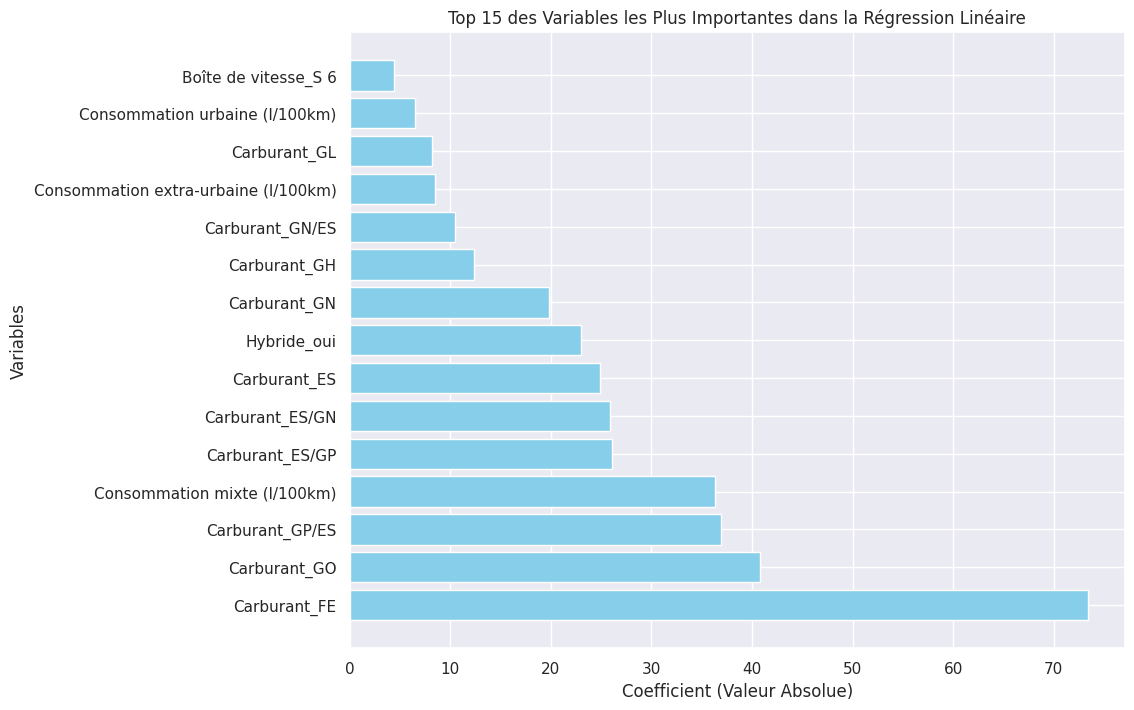

In [ ]:
#1.1.4 Analyse des variables catégorielles:
#Importances Variables Reg Linéaire

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Supposons que regressor soit votre modèle déjà formé et X_train vos données d'entraînement
# regressor = LinearRegression().fit(X_train, y_train)

# Récupérer les noms des variables
feature_names = X_train.columns

# Récupérer les coefficients du modèle, en valeur absolue pour faciliter la comparaison
coefficients = abs(regressor.coef_)

# Créer un DataFrame pour lier chaque variable à son coefficient
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Trier le DataFrame en fonction de l'importance des coefficients
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Prendre seulement les 10 premières variables les plus importantes
top_10_coeff_df = coeff_df.head(15)

# Afficher le diagramme en barres
plt.figure(figsize=(10, 8))
plt.barh(top_10_coeff_df['Feature'], top_10_coeff_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient (Valeur Absolue)')
plt.ylabel('Variables')
plt.title('Top 15 des Variables les Plus Importantes dans la Régression Linéaire')
plt.show()





In [ ]:
#1.1.5 Analyse du choix des variables catégorielles
#cette cellule s'execute qu'avec df, cette cellule englobe l'encodage etc jusqu'à l'affichage des combinaisons de variables

#2min 38s temps d'exe chez moi

from itertools import combinations



def is_outlier(cv_mean_train, test_score, overfitting, mean_time, std_time):
    # Condition pour vérifier si cv_mean_train est un outlier
    if cv_mean_train < 0.5 or cv_mean_train > 1:
        return True
    else:
        return False


#Echantillonage-Encodage-Standardisation-De-duplication
# Suppression des colonnes
indices_a_supprimer2 = ['Modèle dossier', 'Modèle UTAC', 'Désignation commerciale', 'CNIT',
       'Type Variante Version (TVV)', 'Champ V9', 'Date de mise à jour',
       'Puissance administrative',
       'masse vide euro min (kg)']

dfcomb=data.copy()

dmlc = dfcomb.drop(indices_a_supprimer2, axis=1)
# création échantillons Train et test
feats=dmlc.drop('CO2 (g/km)',axis=1)
target=dmlc['CO2 (g/km)']

X_train, X_test, y_train, y_test = train_test_split(feats,target,test_size=0.3,random_state=k)

var_principales = ['Carburant', 'Hybride', 'Consommation mixte (l/100km)']
var_sec = ['Marque', 'Puissance maximale (kW)', 'Boîte de vitesse',
           'Consommation urbaine (l/100km)', 'Consommation extra-urbaine (l/100km)',
           'CO type I (g/km)', 'NOX (g/km)', 'masse vide euro max (kg)',
           'Carrosserie', 'gamme']

# Initialisation des DataFrames pour stocker les résultats
results_dc = pd.DataFrame(columns=['Combinaison', 'CV Score mean train', 'Score test',
                                   'Overfitting', 'Temps de calcul moyen (s)',
                                   'Écart-type du temps de calcul (s)'])

results_df = pd.DataFrame(columns=['Combinaison', 'CV Score mean train', 'Score test',
                                   'Overfitting', 'Temps de calcul moyen (s)',
                                   'Écart-type du temps de calcul (s)'])



outliers_df = pd.DataFrame(columns=['Combinaison', 'CV Score mean train', 'Score test',
                                    'Overfitting', 'Temps de calcul moyen (s)',
                                    'Écart-type du temps de calcul (s)'])

# Génération de toutes les combinaisons possibles de variables secondaires
for r in range(len(var_sec) + 1):
    for subset in combinations(var_sec, r):
        selected_vars = var_principales + list(subset)

        # Sélection des variables choisies pour l'entraînement et l'encodage
        X_train_copy = X_train[selected_vars].copy()
        y_train_copy = y_train.copy()  # Créez une copie de y_train ici
        X_test_copy = X_test[selected_vars].copy()
        y_test_copy = y_test.copy()




        cols = X_train_copy[selected_vars].select_dtypes(include=['float64', 'int64']).columns.tolist()
        cat = X_train_copy[selected_vars].select_dtypes(include=['object']).columns.tolist()




        # Initialisation des compteurs et des listes pour suivre les changements
        rows_added_to_test = 0
        rows_added_to_train = 0
        modalities_added_to_test = {}
        modalities_added_to_train = {}

        for col in cat:  # 'cat' est la liste des colonnes catégorielles
            # Trouver les modalités uniques dans les ensembles d'entraînement et de test
            train_modalities = set(X_train_copy[col].unique())
            test_modalities = set(X_test_copy[col].unique())

            # Identifier les modalités présentes dans l'ensemble d'entraînement mais pas dans l'ensemble de test
            missing_in_test = train_modalities - test_modalities

            # Identifier les modalités présentes dans l'ensemble de test mais pas dans l'ensemble d'entraînement
            missing_in_train = test_modalities - train_modalities

            # Dedupliquer les modalités manquantes dans l'ensemble de test
            for modality in missing_in_test:
                sample_row = X_train_copy[X_train_copy[col] == modality].sample(1)
                sample_y = y_train_copy.loc[sample_row.index]  # Assurez-vous que l'index correspond
                X_test_copy = pd.concat([X_test_copy, sample_row], ignore_index=True)
                y_test_copy = pd.concat([y_test_copy, sample_y], ignore_index=True)

                # Mettre à jour les compteurs et les listes
                rows_added_to_test += 1
                if col not in modalities_added_to_test:
                    modalities_added_to_test[col] = []
                modalities_added_to_test[col].append(modality)

            # Dedupliquer les modalités manquantes dans l'ensemble d'entraînement
            for modality in missing_in_train:
                sample_row = X_test_copy[X_test_copy[col] == modality].sample(1)
                sample_y = y_test_copy.loc[sample_row.index]  # Assurez-vous que l'index correspond
                X_train_copy = pd.concat([X_train_copy, sample_row], ignore_index=True)
                y_train_copy = pd.concat([y_train_copy, sample_y], ignore_index=True)

                # Mettre à jour les compteurs et les listes
                rows_added_to_train += 1
                if col not in modalities_added_to_train:
                    modalities_added_to_train[col] = []
                modalities_added_to_train[col].append(modality)

        #####################################


        # Initialisation de l'encodeur one-hot avec l'option drop='first' et sparse=False
        oneh = OneHotEncoder(drop='first', sparse=False)


        # Encodage des colonnes catégorielles pour les données d'entraînement
        encoded_cat_columns_train = oneh.fit_transform(X_train_copy[cat])

        # Encodage des colonnes catégorielles pour les données de test
        encoded_cat_columns_test = oneh.transform(X_test_copy[cat])


        # Obtenez les catégories uniques pour chaque colonne catégorielle
        categories = [oneh.categories_[i][1:] for i in range(len(oneh.categories_))]


        # Créez les noms de colonnes pour le DataFrame encodé
        feature_names = []
        for col, cats in zip(cat, categories):
            for category in cats:
                feature_names.append(f"{col}_{category}")

        # Utilisez ces noms de colonnes lors de la création du DataFrame
        encoded_cat_df_train = pd.DataFrame(encoded_cat_columns_train, columns=feature_names)
        encoded_cat_df_test = pd.DataFrame(encoded_cat_columns_test, columns=feature_names)


        # Suppression des colonnes catégorielles originales des données encodées dans X_train_copy et X_test_copy
        X_train_copy = X_train_copy.drop(columns=cat)
        X_test_copy = X_test_copy.drop(columns=cat)


        X_train_copy.reset_index(drop=True, inplace=True)
        encoded_cat_df_train.reset_index(drop=True, inplace=True)
        X_train_copy = pd.concat([X_train_copy, encoded_cat_df_train], axis=1)

        X_test_copy.reset_index(drop=True, inplace=True)
        encoded_cat_df_test.reset_index(drop=True, inplace=True)
        X_test_copy = pd.concat([X_test_copy, encoded_cat_df_test], axis=1)



        # Standardisation des colonnes numériques
        sc = StandardScaler()
        X_train_copy[cols] = sc.fit_transform(X_train_copy[cols])
        X_test_copy[cols] = sc.transform(X_test_copy[cols])


        # Entraînement et évaluation du modèle
        regressor = LinearRegression()

        # Validation croisée
        cv_scores_train = cross_val_score(regressor, X_train_copy, y_train_copy, cv=5)
        cv_mean_train = np.mean(cv_scores_train)

        # Entraînement du modèle
        regressor.fit(X_train_copy, y_train_copy)

        # Évaluation du modèle
        test_score = regressor.score(X_test_copy, y_test_copy)

        # Calcul de l'overfitting
        overfitting = cv_mean_train - test_score

        # Temps de calcul
        times = []
        for _ in range(10):
            start_time = time.time()
            regressor.fit(X_train_copy, y_train_copy)
            end_time = time.time()
            times.append(end_time - start_time)

        mean_time = np.mean(times)
        std_time = np.std(times)

        # Vérification pour des valeurs aberrantes
        if is_outlier(cv_mean_train, test_score, overfitting, mean_time, std_time):
            new_row = pd.DataFrame([{'Combinaison': subset,
                         'CV Score mean train': cv_mean_train,
                         'Score test': test_score,
                         'Overfitting': overfitting,
                         'Temps de calcul moyen (s)': mean_time,
                         'Écart-type du temps de calcul (s)': std_time}])
            outliers_df = pd.concat([outliers_df, new_row], ignore_index=True)
        else:
            new_row = pd.DataFrame([{'Combinaison': subset,
                         'CV Score mean train': cv_mean_train,
                         'Score test': test_score,
                         'Overfitting': overfitting,
                         'Temps de calcul moyen (s)': mean_time,
                         'Écart-type du temps de calcul (s)': std_time}])
            results_df = pd.concat([results_df, new_row], ignore_index=True)

# Triez le DataFrame en fonction de vos critères
results_df = results_df.sort_values(by=['Score test'], ascending=False)
results_df_time_overfitting = results_df.sort_values(by=['Temps de calcul moyen (s)', 'Overfitting'])

# Afficher les meilleures combinaisons de variables
display(results_df.head()) # Meilleur score
display(results_df_time_overfitting.head()) # Meilleur overfitting/temps

# Afficher la liste des combinaisons aberrantes
display(outliers_df.head())

,Combinaison,CV Score mean train,Score test,Overfitting,Temps de calcul moyen (s),Écart-type du temps de calcul (s)
505,"(Puissance maximale (kW), Boîte de vitesse, Co...",0.997730,0.997947,-0.000217,0.008201,0.003007
511,"(Puissance maximale (kW), Boîte de vitesse, Co...",0.997728,0.997944,-0.000215,0.018200,0.006058
484,"(Puissance maximale (kW), Boîte de vitesse, Co...",0.997715,0.997933,-0.000218,0.007877,0.001641
504,"(Puissance maximale (kW), Boîte de vitesse, Co...",0.997648,0.997931,-0.000284,0.012613,0.002893
475,"(Puissance maximale (kW), Boîte de vitesse, Co...",0.997715,0.997930,-0.000216,0.012868,0.002705


,Combinaison,CV Score mean train,Score test,Overfitting,Temps de calcul moyen (s),Écart-type du temps de calcul (s)
101,"(Consommation urbaine (l/100km), CO type I (g/...",0.997150,0.997445,-0.000295,0.003134,0.000066
95,"(Consommation urbaine (l/100km), Consommation ...",0.996991,0.997351,-0.000360,0.003137,0.000062
65,"(Puissance maximale (kW), CO type I (g/km), ma...",0.997232,0.997534,-0.000303,0.003161,0.000050
110,"(Consommation extra-urbaine (l/100km), CO type...",0.997109,0.997460,-0.000351,0.003162,0.000119
1,"(Puissance maximale (kW),)",0.996380,0.996763,-0.000383,0.003177,0.000153


,Combinaison,CV Score mean train,Score test,Overfitting,Temps de calcul moyen (s),Écart-type du temps de calcul (s)
0,"(Marque,)",-2.401195e+19,0.996646,-2.401195e+19,0.012839,0.003839
1,"(Marque, Puissance maximale (kW))",-1.371525e+20,0.997193,-1.371525e+20,0.019848,0.005595
2,"(Marque, Boîte de vitesse)",-4.236033e+19,0.996713,-4.236033e+19,0.031931,0.009366
3,"(Marque, Consommation urbaine (l/100km))",-1.775206e+17,0.997288,-1.775206e+17,0.017275,0.003459
4,"(Marque, Consommation extra-urbaine (l/100km))",-1.804244e+19,0.997361,-1.804244e+19,0.021129,0.001989


# Etude comparative Regression lineaire vs Random Forest regressor

Preprocessing du dataset de 2014

In [ ]:
from google.colab import files
file = files.upload()

Saving mars-2014-complete.csv to mars-2014-complete.csv


In [ ]:
data_2014=pd.read_csv("mars-2014-complete.csv",encoding='latin-1',sep=";")
test_data=data_2014[["dscom","cnit","cod_cbr","hybride","puiss_max","typ_boite_nb_rapp","conso_urb","conso_exurb","conso_mixte","co2","masse_ordma_max","Carrosserie","gamme"]]
test_data.head()

,dscom,cnit,cod_cbr,hybride,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_max,Carrosserie,gamme
0,159 1750 Tbi (200ch),M10ALFVP000G340,ES,non,147,M 6,"11,30000019","5,800000191","7,800000191",182.0,1505,BERLINE,MOY-SUPER
1,159 1750 Tbi (200ch),M10ALFVP000H341,ES,non,147,M 6,"11,5",6,8,186.0,1555,BERLINE,MOY-SUPER
2,159 2.0 JTDm (136ch),M10ALFVP000E302,GO,non,100,M 6,"6,599999905","4,199999809","5,099999905",134.0,1565,BERLINE,MOY-SUPER
3,159 2.0 JTDm (136ch),M10ALFVP000F303,GO,non,100,M 6,"6,599999905","4,199999809","5,099999905",134.0,1565,BERLINE,MOY-SUPER
4,159 2.0 JTDm (170ch),M10ALFVP000G304,GO,non,125,M 6,"6,900000095","4,300000191","5,300000191",139.0,1565,BERLINE,MOY-SUPER


In [ ]:
 #ajout classification de la colonne cible
test_data['labellisation'] =pd.cut(test_data['co2'], bins=[0.0,100.0, 120.0 ,140.0, 160.0, 200.0,250.0,test_data['co2'].max()],labels=['A','B','C','D','E','F','G'],right=True)
# data_quality pour aligner le nouveau dataframe au jeu du projet
test_data=test_data[-((test_data["typ_boite_nb_rapp"]=='V .')|(test_data["typ_boite_nb_rapp"]=='A 9'))]
test_data=test_data[-((test_data["cod_cbr"]=='EL')|(test_data["cod_cbr"]=='EE'))]
test_data=test_data.replace({'COMBISPCACE' : 'COMBISPACE'})
test_data=test_data.replace({'MOY-INFERIEURE' : 'MOY-INF'})
# renommage des colonnes et data_quality
new_names =  {"cod_cbr":"Carburant",
				"hybride":"Hybride",
				"puiss_max":"Puissance maximale (kW)",
				"typ_boite_nb_rapp":"Boîte de vitesse",
				"conso_urb":"Consommation urbaine (l/100km)",
				"conso_exurb":"Consommation extra-urbaine (l/100km)",
				"conso_mixte":"Consommation mixte (l/100km)",
				"masse_ordma_max":"masse vide euro max (kg)"}

test_data = test_data.rename(new_names, axis = 1)
test_data["Puissance maximale (kW)"] = pd.to_numeric(test_data["Puissance maximale (kW)"].str.replace(',', '.', regex=True))
test_data["Consommation urbaine (l/100km)"] = pd.to_numeric(test_data["Consommation urbaine (l/100km)"].str.replace(',', '.', regex=True))
test_data["Consommation extra-urbaine (l/100km)"] = pd.to_numeric(test_data["Consommation extra-urbaine (l/100km)"].str.replace(',', '.', regex=True))
test_data["Consommation mixte (l/100km)"] = pd.to_numeric(test_data["Consommation mixte (l/100km)"].str.replace(',', '.', regex=True))
# dédoublonnage des cnit
test_data=test_data.drop_duplicates(subset=['cnit'],keep='first')
test_data=pd.merge(data['CNIT'],test_data,left_on='CNIT', right_on='cnit',how='right' ) # on identifie les cnit communs entre 2013 et 2014
test_data=test_data.loc[pd.isnull(test_data['CNIT'])] # on élimine de 2014 les cnit déjà connus en 2013
test_data=test_data.drop('CNIT',axis=1) # on supprime la colonne CNIT
test_data.reset_index(drop=True) # maj de l'index
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53020 entries, 3 to 54912
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   dscom                                 53020 non-null  object  
 1   cnit                                  53020 non-null  object  
 2   Carburant                             53020 non-null  object  
 3   Hybride                               53020 non-null  object  
 4   Puissance maximale (kW)               53020 non-null  float64 
 5   Boîte de vitesse                      53020 non-null  object  
 6   Consommation urbaine (l/100km)        53020 non-null  float64 
 7   Consommation extra-urbaine (l/100km)  53020 non-null  float64 
 8   Consommation mixte (l/100km)          53020 non-null  float64 
 9   co2                                   53020 non-null  float64 
 10  masse vide euro max (kg)              53020 non-null  int64   
 11  Ca

In [ ]:
test_data.isna().sum().sum() # valeurs manquantes

0

In [ ]:
# on isole les vraies valeurs de CO2 dans un dataset avec les identifiants des véhicules
result=test_data[["dscom","cnit","co2","labellisation"]]

In [ ]:

# le jeu d'entainement sera l'intégralité du fichier précédent (data_final) et le jeu de test sera le nouveau fichier (test_data)
#creation d'un dataframe de travail pour la modelisation avec les variables pertinentes

data_f=data.drop(['Marque','Modèle dossier','Modèle UTAC','Désignation commerciale','CNIT', 'Type Variante Version (TVV)',
                'Puissance administrative','masse vide euro min (kg)', 'Champ V9','Date de mise à jour','CO type I (g/km)', 'NOX (g/km)'], axis=1)

start_time = time.time()
X_train = data_f[['Carburant','Hybride','Puissance maximale (kW)','Boîte de vitesse','Consommation urbaine (l/100km)','Consommation extra-urbaine (l/100km)','Consommation mixte (l/100km)','masse vide euro max (kg)','Carrosserie','gamme']]
y_train = data_f['CO2 (g/km)']
X_test  = test_data.copy()
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

Temps de calcul: 0.004 seconds


In [ ]:
#regression par RanfomForest


start_time = time.time()

numeric_features = [2,4,5,6,7]#
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )


#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regressor", RandomForestRegressor())]
)

clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 11.619 seconds


In [ ]:
# on isole les prediction du Random dans un dataframe
predictions_reg_rf = pd.DataFrame({
        "cnit": test_data["cnit"],
        "rf_predict": clf.predict(X_test)
    })
# on les merge avec les vraies valeurs
result = pd.merge(predictions_reg_rf, result , on="cnit")

In [ ]:
# regression lineaire
start_time = time.time()
numeric_features = [2,4,5,6,7]# Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )
#X_train = preprocessor.fit_transform(X_train)

#Pipeline final de regroupement
reg = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regressor", LinearRegression())]
)

reg.fit(X_train, y_train)
y_test = reg.predict(X_test)
print("model score: %.3f" % reg.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 0.317 seconds


In [ ]:
# on isole les prediction de la regression dans un dataframe
predictions_reg_rl = pd.DataFrame({
        "cnit": test_data["cnit"],
        "co2_reg_predict": reg.predict(X_test)
    })
# on merge le tout dans le dataframe resultat
result = pd.merge(predictions_reg_rl, result, on="cnit")

In [ ]:
#calcul des métriques de regression à partir du dataframe result

# random Forest
start_time = time.time()
mae_random_forest= mean_absolute_error(result.co2,result.rf_predict)
mse_random_forest = mean_squared_error(result.co2,result.rf_predict,squared=True)
rmse_random_forest = mean_squared_error(result.co2,result.rf_predict,squared=False)
elapsed_time = time.time() - start_time
print(f"Temps de calcul des metriques rf: {elapsed_time:.3f} seconds")
# regression lineaire
start_time = time.time()
mae_regression= mean_absolute_error(result.co2,result.co2_reg_predict)
mse_regression = mean_squared_error(result.co2,result.co2_reg_predict,squared=True)
rmse_regression = mean_squared_error(result.co2,result.co2_reg_predict,squared=False)
elapsed_time = time.time() - start_time
print(f"Temps de calcul des metriques rl: {elapsed_time:.3f} seconds")

# Creation d'un dataframe pour comparer les metriques des deux algorithmes

metriques = {'MSE': [mse_regression,mse_random_forest],
             'MAE': [mae_regression,mae_random_forest],
             'RMSE': [rmse_regression,rmse_random_forest]}

# Creer DataFrame
df = pd.DataFrame(metriques, index = ['Regression Lineaire', 'Random Forest '])
print(" Comparaison des metriques des deux algorithmes de regression")
df.head()

Temps de calcul des metriques rf: 0.003 seconds
Temps de calcul des metriques rl: 0.003 seconds
 Comparaison des metriques des deux algorithmes de regression


,MSE,MAE,RMSE
Regression Lineaire,4.858557,1.608005,2.204214
Random Forest,2.674284,0.657654,1.635324



En regardant la métrique la plus interprétable (MAE), nous pouvons conclure qu'en moyenne, le modèle de la Rgression linéaire se trompe en moyenne de 1,6 sur la prédiction de la quantité de CO2 émise et le modèle RandomForest de 0,67 .

In [ ]:


print(result.describe())
fig = go.Figure()
fig.add_trace(go.Box(x=result.co2_reg_predict,name='prediction regression lineaire'))
fig.add_trace(go.Box(x=result.rf_predict,name='prediction random forest'))
fig.add_trace(go.Box(x=result.co2,name='valeurs reelles'))
fig.update_layout(title_text='distribution des valeurs',xaxis_title="CO2 emis g/km",title_x=0.5)
fig.show()

       co2_reg_predict    rf_predict           co2
count     53020.000000  53020.000000  53020.000000
mean        203.166041    202.813794    202.827442
std          32.184347     31.950702     32.240874
min          47.981797     79.030000     48.000000
25%         194.540368    193.000000    193.000000
50%         205.756456    206.940000    207.000000
75%         216.823116    215.980000    218.000000
max         570.465686    535.270000    572.000000


# Prétraitement

In [ ]:
dfc=data.copy()

In [ ]:
# Regrouper les modalités de la variable CO2 pour créer Les classes vertes A, B, C,D, E, F, G pour faire la classification

dfc['Class_co2'] = pd.cut(x = dfc['CO2 (g/km)'] ,
                  bins = [0,100,120,140,160,200,250,dfc['CO2 (g/km)'].max()],
                  labels = ['A','B','C','D','E','F','G'])

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Marque                                5363 non-null   object  
 1   Modèle dossier                        5363 non-null   object  
 2   Modèle UTAC                           5363 non-null   object  
 3   Désignation commerciale               5363 non-null   object  
 4   CNIT                                  5363 non-null   object  
 5   Type Variante Version (TVV)           5363 non-null   object  
 6   Carburant                             5363 non-null   object  
 7   Hybride                               5363 non-null   object  
 8   Puissance administrative              5363 non-null   int64   
 9   Puissance maximale (kW)               5363 non-null   float64 
 10  Boîte de vitesse                      5363 non-null   object  
 11  Cons

In [ ]:
# suppression des variable pas importantes pour notre model
data_classif = dfc.drop(columns = ['Marque','Modèle dossier','Modèle UTAC','Désignation commerciale','CNIT',
                          'Type Variante Version (TVV)','Puissance administrative','masse vide euro min (kg)',
                          'Champ V9','Date de mise à jour','CO type I (g/km)','CO2 (g/km)','NOX (g/km)'])
data_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Carburant                             5363 non-null   object  
 1   Hybride                               5363 non-null   object  
 2   Puissance maximale (kW)               5363 non-null   float64 
 3   Boîte de vitesse                      5363 non-null   object  
 4   Consommation urbaine (l/100km)        5363 non-null   float64 
 5   Consommation extra-urbaine (l/100km)  5363 non-null   float64 
 6   Consommation mixte (l/100km)          5363 non-null   float64 
 7   masse vide euro max (kg)              5363 non-null   int64   
 8   Carrosserie                           5363 non-null   object  
 9   gamme                                 5363 non-null   object  
 10  Class_co2                             5363 non-null   category
dtypes: c

In [ ]:
# Séparation du jeux de donnée en jeux de test et d'entrainement
X = data_classif.drop(columns= 'Class_co2' , axis= 1)
y = data_classif['Class_co2'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , shuffle=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 3129 to 774
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Carburant                             1341 non-null   object 
 1   Hybride                               1341 non-null   object 
 2   Puissance maximale (kW)               1341 non-null   float64
 3   Boîte de vitesse                      1341 non-null   object 
 4   Consommation urbaine (l/100km)        1341 non-null   float64
 5   Consommation extra-urbaine (l/100km)  1341 non-null   float64
 6   Consommation mixte (l/100km)          1341 non-null   float64
 7   masse vide euro max (kg)              1341 non-null   int64  
 8   Carrosserie                           1341 non-null   object 
 9   gamme                                 1341 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 115.2+ KB


In [ ]:
# pipeline prétraitement
numeric_features = ['Puissance maximale (kW)', 'Consommation urbaine (l/100km)', 'Consommation extra-urbaine (l/100km)',
                    'Consommation mixte (l/100km)', 'masse vide euro max (kg)']

# Traitement des valeurs numériques
numeric_transformer =  StandardScaler()

# Traitement des variables catégorielles
categorical_features = ['Carburant', 'Hybride', 'Boîte de vitesse', 'Carrosserie', 'gamme']
categorical_transformer = OneHotEncoder(drop = "first", sparse=False)

#Column Tranformer pour appliquer les transformations sur certaines colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
# transformation des données
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Text(0.5, 1.0, 'Distribution de des classes')

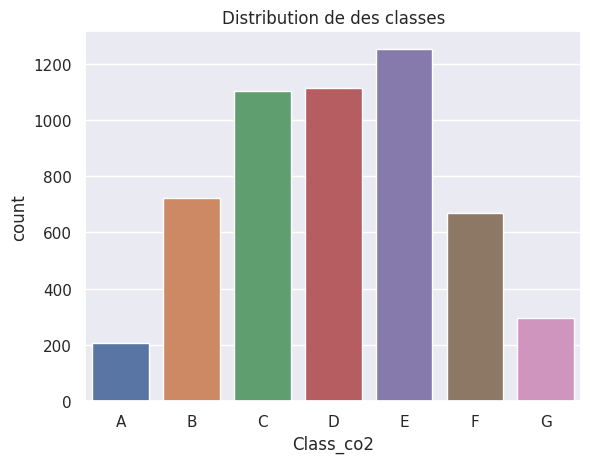

In [ ]:
# afficher la distribution de des classes
g = sns.countplot(x = y)
g.set_xticklabels(['A', 'B', 'C', 'D',
                   'E', 'F', 'G'])
plt.title('Distribution de des classes')

# Modèls de Classification

In [ ]:
# Regrestion Logistique
start = datetime.now()

LR = LogisticRegression()
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

cm = pd.crosstab(y_test,y_pred, rownames =['réalité'], colnames = ['predictions']);
display(cm);
print("le score de bonne prédiction est :" ,LR.score(X_test, y_test) );
print(classification_report(y_test,y_pred));

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

predictions,0,1,2,3,4,5,6
réalité,,,,,,,
0,47,7,0,0,0,0,0
1,4,154,15,4,0,0,0
2,0,8,246,11,0,0,0
3,0,0,18,256,12,0,0
4,0,0,0,21,287,3,0
5,0,0,0,0,24,142,1
6,0,0,0,0,0,3,78


le score de bonne prédiction est : 0.9023117076808352
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.91      0.87      0.89       177
           2       0.88      0.93      0.90       265
           3       0.88      0.90      0.89       286
           4       0.89      0.92      0.91       311
           5       0.96      0.85      0.90       167
           6       0.99      0.96      0.97        81

    accuracy                           0.90      1341
   macro avg       0.92      0.90      0.91      1341
weighted avg       0.90      0.90      0.90      1341

le temps de calcul est : 0:00:00.354202


In [ ]:
# SVM

start = datetime.now()

svm = svm.SVC(C = 10000,gamma = 0.002 ,kernel='rbf')
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
display(pd.crosstab(y_test, y_pred ,rownames=['réalité'], colnames =['predictions']))

print('le score pour du modèle sur l\'enseble d\entrainement est :',svm.score(X_train, y_train))
print('le score pour du modèle sur l\'enseble de test est :',svm.score(X_test, y_test))

print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

predictions,0,1,2,3,4,5,6
réalité,,,,,,,
0,52,2,0,0,0,0,0
1,3,174,0,0,0,0,0
2,0,3,257,5,0,0,0
3,0,0,5,277,4,0,0
4,0,0,0,6,305,0,0
5,0,0,0,0,3,164,0
6,0,0,0,0,0,2,79


le score pour du modèle sur l'enseble d\entrainement est : 0.9910492292391845
le score pour du modèle sur l'enseble de test est : 0.9753914988814317
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.97      0.98      0.98       177
           2       0.98      0.97      0.98       265
           3       0.96      0.97      0.97       286
           4       0.98      0.98      0.98       311
           5       0.99      0.98      0.98       167
           6       1.00      0.98      0.99        81

    accuracy                           0.98      1341
   macro avg       0.98      0.97      0.97      1341
weighted avg       0.98      0.98      0.98      1341

le temps de calcul est : 0:00:00.595192


In [ ]:
# K plus proches voisins
start = datetime.now()

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train , y_train)

y_pred = knn.predict(X_test)
cm = pd.crosstab(y_test, y_pred , rownames =['classe réelle'], colnames =['classe prédite'])
display(cm)
print('le score pour du modèle sur l\'enseble d\'entrainement est :',knn.score(X_train, y_train))
print('le score pour du modèle sur l\'enseble de test est :',knn.score(X_test, y_test))
print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,39,15,0,0,0,0,0
1,11,146,17,3,0,0,0
2,0,17,221,27,0,0,0
3,0,0,40,228,17,1,0
4,0,0,3,29,274,5,0
5,0,0,0,0,20,140,7
6,0,0,0,0,0,5,76


le score pour du modèle sur l'enseble d'entrainement est : 0.8990551964196917
le score pour du modèle sur l'enseble de test est : 0.8381804623415362
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        54
           1       0.82      0.82      0.82       177
           2       0.79      0.83      0.81       265
           3       0.79      0.80      0.80       286
           4       0.88      0.88      0.88       311
           5       0.93      0.84      0.88       167
           6       0.92      0.94      0.93        81

    accuracy                           0.84      1341
   macro avg       0.84      0.83      0.84      1341
weighted avg       0.84      0.84      0.84      1341

le temps de calcul est : 0:00:00.623894


In [ ]:
start = datetime.now()
dt = DecisionTreeClassifier(max_depth = 4, random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = pd.crosstab(y_test, y_pred , rownames =['classe réelle'], colnames =['classe prédite'])
display(cm)
print('le score sur l\'ensemble d\'entrainement est :',dt.score(X_train,y_train))
print('le score sur l\'ensemble de test est :',dt.score(X_test,y_test))

print(classification_report(y_test,y_pred))
end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,35,19,0,0,0,0,0
1,0,172,1,3,1,0,0
2,0,3,238,24,0,0,0
3,0,0,2,273,4,7,0
4,0,0,0,31,267,13,0
5,0,0,0,0,10,157,0
6,0,0,0,0,0,1,80


le score sur l'ensemble d'entrainement est : 0.9102436598707111
le score sur l'ensemble de test est : 0.9112602535421327
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        54
           1       0.89      0.97      0.93       177
           2       0.99      0.90      0.94       265
           3       0.82      0.95      0.88       286
           4       0.95      0.86      0.90       311
           5       0.88      0.94      0.91       167
           6       1.00      0.99      0.99        81

    accuracy                           0.91      1341
   macro avg       0.93      0.89      0.91      1341
weighted avg       0.92      0.91      0.91      1341

le temps de calcul est : 0:00:00.047517


In [ ]:
# Random Forest
from sklearn import ensemble
start = datetime.now()
rf = ensemble.RandomForestClassifier(n_jobs=-1, min_samples_leaf = 1, n_estimators = 500,random_state=321)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames =['classe prédite']))

print('le score sur l\'ensemble d\'entrainement : ',rf.score(X_train,y_train))
print('le score sur l\'ensemble de test : ',rf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,51,1,0,0,0,0,0
1,0,156,3,1,0,0,0
2,0,0,267,4,0,0,0
3,0,0,3,289,4,0,0
4,0,0,0,3,320,0,0
5,0,0,0,0,2,159,0
6,0,0,0,0,0,2,76


le score sur l'ensemble d'entrainement :  0.9995027349577325
le score sur l'ensemble de test :  0.9828486204325131
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      0.97      0.98       160
           2       0.98      0.99      0.98       271
           3       0.97      0.98      0.97       296
           4       0.98      0.99      0.99       323
           5       0.99      0.99      0.99       161
           6       1.00      0.97      0.99        78

    accuracy                           0.98      1341
   macro avg       0.99      0.98      0.98      1341
weighted avg       0.98      0.98      0.98      1341

le temps de calcul est : 0:00:03.011441


Validation Croisée

In [ ]:
start = datetime.now()
# Instancier des classifieurs
clf_lr = LogisticRegression(random_state=42, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=42)
clf_svc = SVC(random_state=42)
# Création des grilles de paramètres
param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                        'min_samples_leaf': [1, 3, 5],
                        'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                       {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_svc),
                            (clf_lr, clf_rf, clf_svc),
                            ('LogisticRegression', 'RF', 'SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    gridcvs[name] = gcv

outer_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_train, y_train, cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

LogisticRegression: outer accuracy 96.15 +/- 0.87
RF: outer accuracy 98.14 +/- 0.42
SVM: outer accuracy 96.87 +/- 0.64
le temps de calcul est : 0:08:52.956024


In [ ]:
start = datetime.now()

final_clf = gridcvs['RF']
final_clf.fit(X_train, y_train)
# Affichage des meilleurs paramètres pour le model choisi .
print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))
print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

,Importance
Consommation mixte (l/100km),0.285700
Consommation extra-urbaine (l/100km),0.209953
Consommation urbaine (l/100km),0.208619
masse vide euro max (kg),0.081582
Puissance maximale (kW),0.061224
Carburant_GO,0.026520
Carburant_ES,0.025345
Carrosserie_MINIBUS,0.011385


<Axes: >

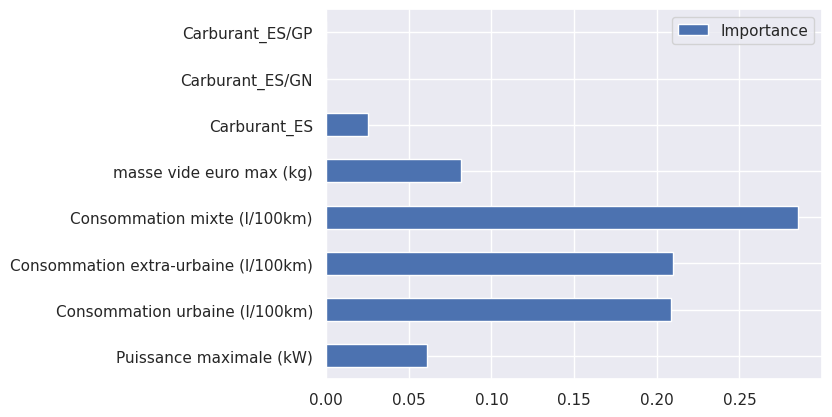

In [ ]:
# Importance des variable dans RandomForest

# récuperation des noms des variables
column_names = (
    numeric_features + preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
)
column_names

feats = {}
for featur,importance in zip(column_names,rf.feature_importances_):
    feats[featur] = importance
# creation de Dataframe des inportances des variables
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
# affichage
display(importances.sort_values(by='Importance', ascending=False).head(8))
importances.head(8).plot(kind='barh')



# Interpretabilité du modèl: Méthode shap

In [ ]:
# utilisation de shap pour expliquer les prediction
# pour afficher les graphiques de shap dans le notebook
shap.initjs()

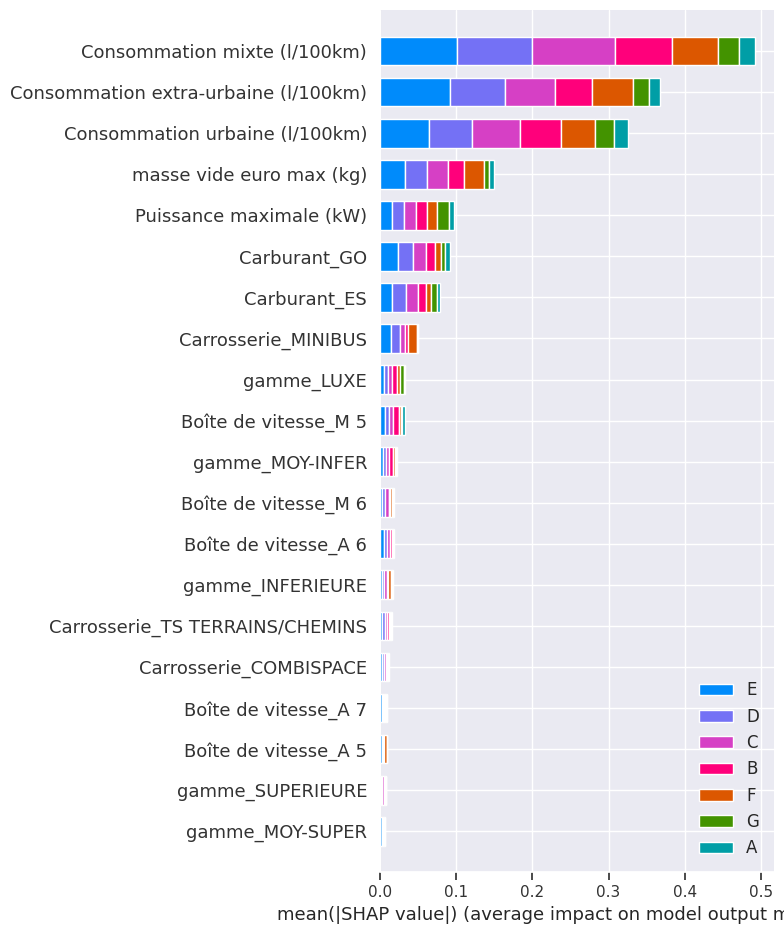

In [ ]:
# pour l'ensemble d'entrainement
# Créez un objet SHAP en utilisant l’explicatif TreeExplainer
explainer = shap.TreeExplainer(rf)
# Appelez la méthode explain en lui passant les données d’entrée
shap_values_train = explainer.shap_values(X_train)
# Affichez un graphique résumé de l’importance relative de chaque caractéristique
shap.summary_plot(shap_values_train,column_names, class_names={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'} ,plot_type="bar")


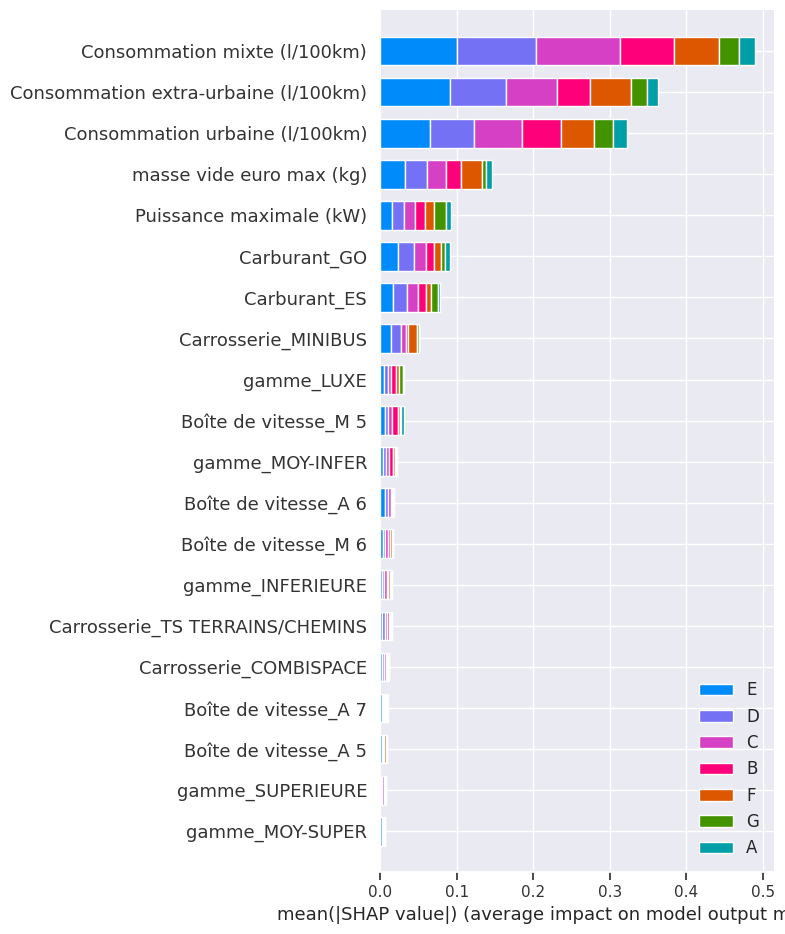

In [ ]:
# pour l'ensemble de test
explainer = shap.TreeExplainer(rf)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test,column_names, class_names={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'} ,plot_type="bar")



In [ ]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = [pd.DataFrame(shap_values_train[i]) for i in [0,1,2,3,4,5,6]]
shap_values_test_ = [pd.DataFrame(shap_values_test[i]) for i in [0,1,2,3,4,5,6]]



Pour UNE donnée : On peut voir les influences de chaque variable sur la prédiction


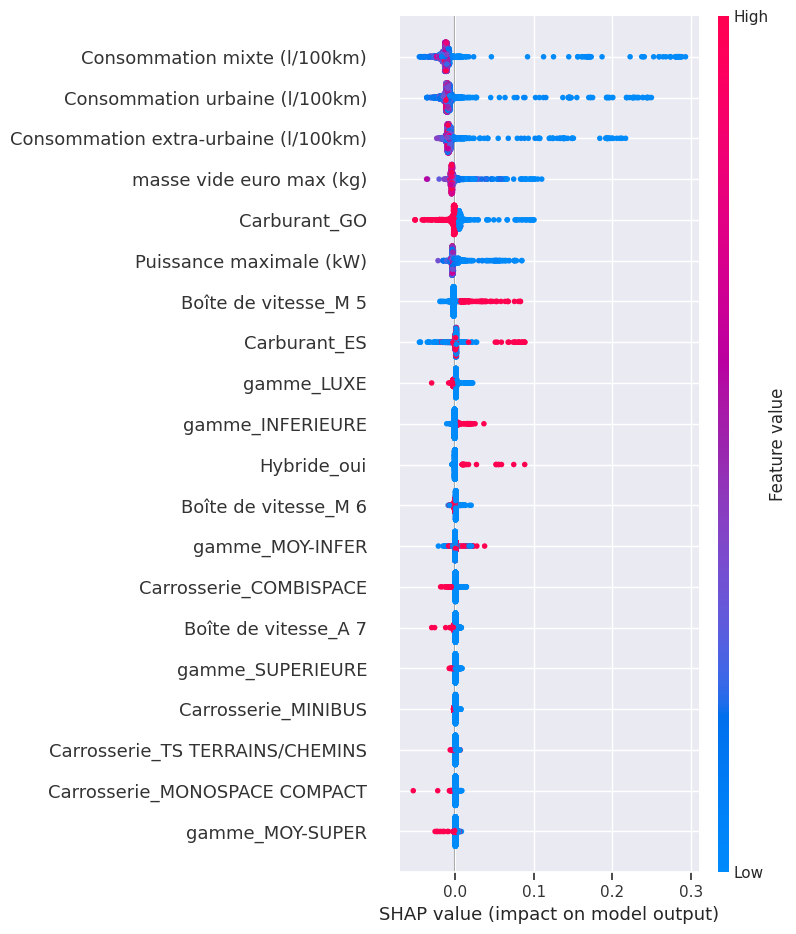

In [ ]:
#pour la class A
shap.summary_plot(shap_values_test[0] , X_test , feature_names = column_names)

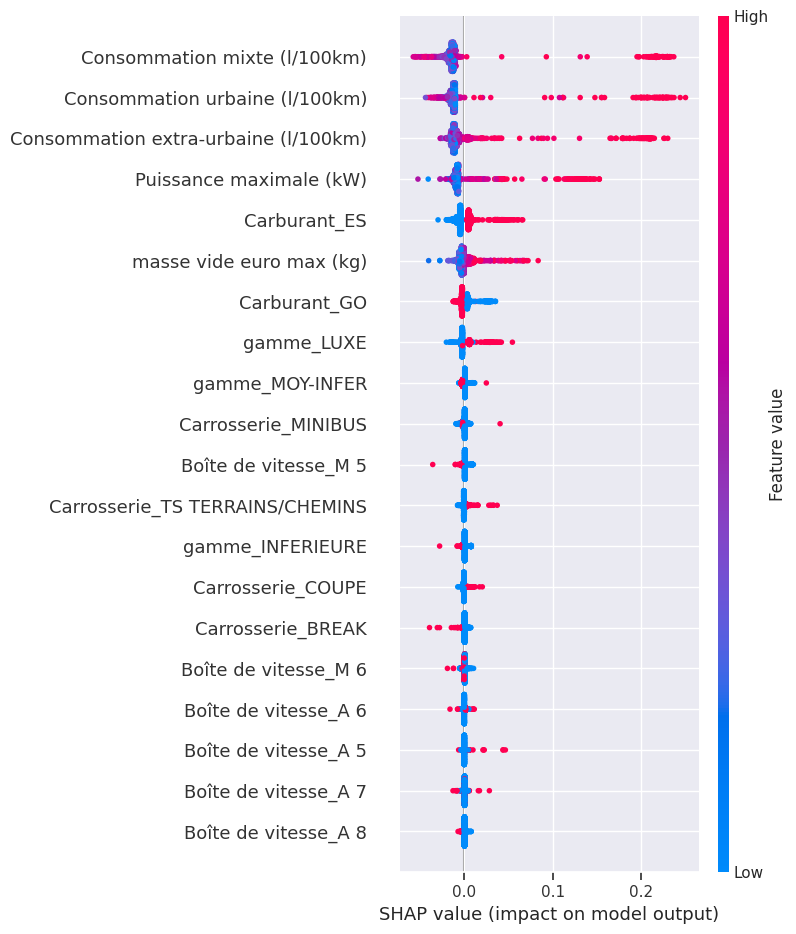

In [ ]:
shap.summary_plot(shap_values_test[6] , X_test , feature_names = column_names)
#Ces graphiques peuvent être dessinés pour chaque classe, par exemple pour la classe 6 la classe G
#  on obtient un graphique presque inverse :

#  Classification : SVM vs RandomForest

In [ ]:
  data_final=data.copy()
  data_final['labellisation'] =pd.cut(data_final['CO2 (g/km)'], bins=[0.0,100.0, 120.0 ,140.0, 160.0, 200.0,250.0,df['CO2 (g/km)'].max()],labels=['A','B','C','D','E','F','G'],right=True)
  data_final=data_final.drop(['Marque','Modèle dossier','Modèle UTAC','Désignation commerciale','CNIT', 'Type Variante Version (TVV)','Puissance administrative','masse vide euro min (kg)', 'Champ V9','Date de mise à jour','CO type I (g/km)', 'NOX (g/km)','CO2 (g/km)'], axis=1)


In [ ]:
# On sépare en jeu d'entrainement/test

start_time = time.time()
X_train = data_final.drop('labellisation', axis=1)
y_train = data_final['labellisation']
X_test  = test_data.copy()
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

Temps de calcul: 0.021 seconds


In [ ]:
#Classification par RanfomForest

start_time = time.time()

numeric_features = [2,4,5,6,7]#
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )


#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier())]
)

clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 3.794 seconds


In [ ]:
# on isole les prediction du rf_clf  dans un dataframe
predictions_rf = pd.DataFrame({
        "cnit": test_data["cnit"],
        "rf_clf_predict": clf.predict(X_test)
    })
# on les merge avec les valeurs réelles
result = pd.merge(predictions_rf, result, on="cnit")

In [ ]:
#Classification par SVM


start_time = time.time()

numeric_features = [2,4,5,6,7]#
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )


#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", svm.SVC(C = 10000,gamma = 0.002 ,kernel='rbf'))]
)

clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 5.376 seconds


In [ ]:
# on isole les prediction du rf_svm  dans un dataframe
predictions_svm = pd.DataFrame({
        "cnit": test_data["cnit"],
        "svm_predict": clf.predict(X_test)
    })
# on les merge également avec les vraies valeurs
result = pd.merge(predictions_svm, result, on="cnit")

In [ ]:
# matrices de classification
display("tableau de classification svm")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.svm_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
display("tableau de classification du RandomForest")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.rf_clf_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

'tableau de classification svm'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,270,9,0,0,0,0,0
B,0,1259,15,0,0,0,0
C,0,32,2145,39,2,0,0
D,0,0,3,1452,9,0,0
E,0,0,2,11,15666,371,0
F,0,0,0,0,7,29772,1
G,0,0,0,0,0,13,1942


Temps de calcul: 0.032 seconds


'tableau de classification du RandomForest'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,262,17,0,0,0,0,0
B,0,1220,54,0,0,0,0
C,0,69,2112,35,2,0,0
D,0,0,0,1462,2,0,0
E,0,0,0,11,16037,2,0
F,0,0,0,0,0,29780,0
G,0,0,0,0,0,14,1941


Temps de calcul: 0.024 seconds


In [ ]:
# Rapports de classification
start_time = time.time()
print("Rapport de classification Sector Vector Machine")
print(classification_report(result.labellisation,result.svm_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
start_time = time.time()
print("Rapport de classification RandomForest ")
print(classification_report(result.labellisation,result.rf_clf_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

Rapport de classification Sector Vector Machine
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       279
           B       0.97      0.99      0.98      1274
           C       0.99      0.97      0.98      2218
           D       0.97      0.99      0.98      1464
           E       1.00      0.98      0.99     16050
           F       0.99      1.00      0.99     29780
           G       1.00      0.99      1.00      1955

    accuracy                           0.99     53020
   macro avg       0.99      0.98      0.99     53020
weighted avg       0.99      0.99      0.99     53020

Temps de calcul: 1.573 seconds
Rapport de classification RandomForest 
              precision    recall  f1-score   support

           A       1.00      0.94      0.97       279
           B       0.93      0.96      0.95      1274
           C       0.98      0.95      0.96      2218
           D       0.97      1.00      0.98      1464
           E 

# PARTIE 3 : CLASSIFICATION OU REGRESSION?
 Regression Lineaire vs SVM

In [ ]:
# ajout dans le dataframe result d'une colonne transformée en classe à partir des prédictions de la regression linéaire
result['label_reg_predict'] =pd.cut(result['co2_reg_predict'], bins=[0.0,100.0, 120.0 ,140.0, 160.0, 200.0,250.0,test_data['co2'].max()],labels=['A','B',"C","D","E","F","G"],right=True)

In [ ]:
# Matrices de classification
display("tableau de classification svm")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.svm_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
display("tableau de classification  regression lineaire")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.label_reg_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

'tableau de classification svm'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,270,9,0,0,0,0,0
B,0,1259,15,0,0,0,0
C,0,32,2145,39,2,0,0
D,0,0,3,1452,9,0,0
E,0,0,2,11,15666,371,0
F,0,0,0,0,7,29772,1
G,0,0,0,0,0,13,1942


Temps de calcul: 0.025 seconds


'tableau de classification  regression lineaire'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,209,70,0,0,0,0,0
B,6,1139,129,0,0,0,0
C,2,25,2068,123,0,0,0
D,0,0,18,1408,38,0,0
E,0,0,0,26,15910,114,0
F,0,0,0,0,45,29702,33
G,0,0,0,0,0,0,1955


Temps de calcul: 0.025 seconds


In [ ]:
# Rapports de classification du svm
start_time = time.time()
print("Rapport de classification Sector Vector Machine")
print(classification_report(result.labellisation,result.svm_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
# Rapports de classification après predicion du modèles rl
start_time = time.time()
print("Rapport de classification regression lineaire")
print(classification_report(result.labellisation,result.label_reg_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")


Rapport de classification Sector Vector Machine
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       279
           B       0.97      0.99      0.98      1274
           C       0.99      0.97      0.98      2218
           D       0.97      0.99      0.98      1464
           E       1.00      0.98      0.99     16050
           F       0.99      1.00      0.99     29780
           G       1.00      0.99      1.00      1955

    accuracy                           0.99     53020
   macro avg       0.99      0.98      0.99     53020
weighted avg       0.99      0.99      0.99     53020

Temps de calcul: 1.677 seconds
Rapport de classification regression lineaire
              precision    recall  f1-score   support

           A       0.96      0.75      0.84       279
           B       0.92      0.89      0.91      1274
           C       0.93      0.93      0.93      2218
           D       0.90      0.96      0.93      1464
       